#Problem Identification
**Choose a real-world problem to solve-**


*   Choosing a real world problem which is wine quality prediction

**Clearly outline what the project aims to achieve-**

The primary goal of this project is to predict the quality of red wine based on its physicochemical properties.

*   Creating machine learning model to get accurately predict wine quality  
*   Get the relation between  physicochemical properties and wine quality to identify key factors that influence quality.

**Identify the primary target audience or users-**


*   Wine Producer
*   Wine Exporter
*   Consumer
*   Data Scientist and Researcher






#Data Collection


*   Source - UCI Repositry
*   Link - https://archive.ics.uci.edu/dataset/186/wine+quality



#Exploratory Data Analysis (EDA)
EDA is the analysis of dataset characteristics and visualizing the data.


Load Dataset

In [59]:
#from google.colab import drive
#drive.mount('/content/drive')

In [60]:
#Load Dataset
import pandas as pd
df = pd.read_csv('winequality-red1.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Creating a data summary report


In [61]:
!pip install ydata-profiling


In [62]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df, explorative=True)

# Save or display the report
profile.to_file("data_report.html")  # Save as an HTML file


ModuleNotFoundError: No module named 'pkg_resources'

#Data Analysis

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [65]:
#heatmap
corr_matrix = df.corr()
corr_matrix['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

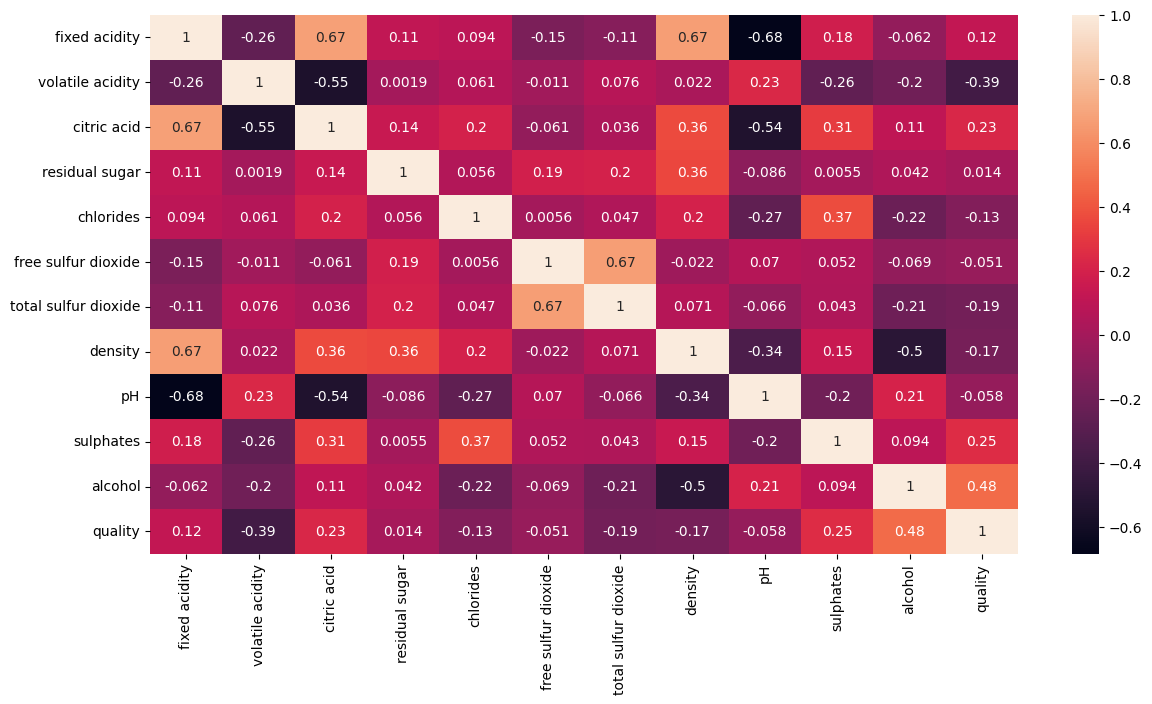

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

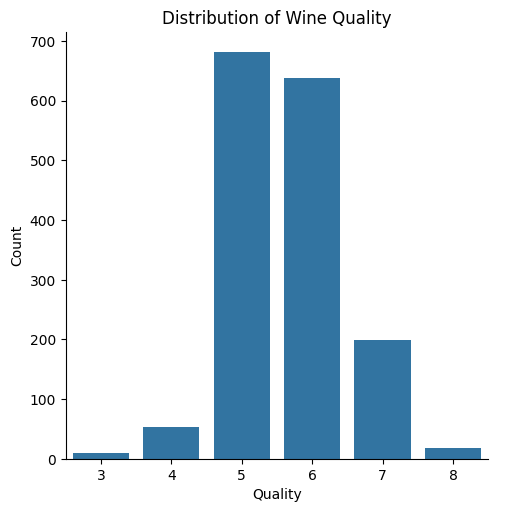

In [67]:
# Create a count plot using seaborn
sns.catplot(data=df, x='quality', kind='count')

# Add labels and title to the plot
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

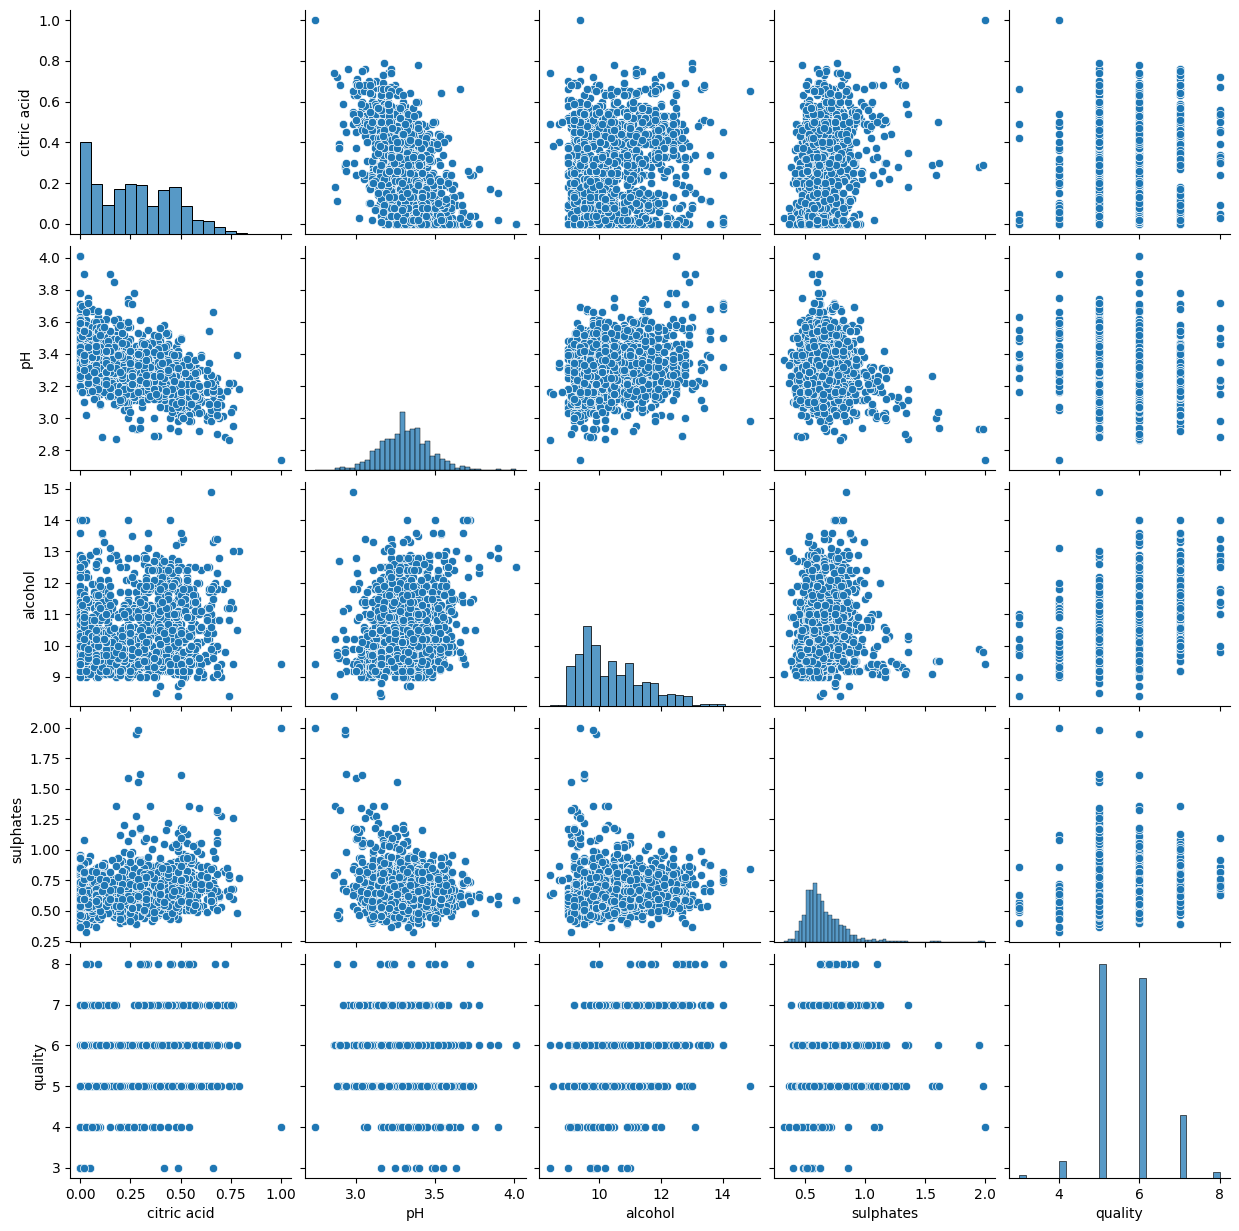

In [68]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
sns.pairplot(df[attribute_list])
plt.show()

#Split data into training and testing sets

In [69]:
from sklearn.model_selection import train_test_split # For data splitting for machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization

In [70]:
# Split the data into training and testing sets


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42) # 80% training and 20% test


#Data Cleaning
It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:

*   Handling Missing Values
* Handling Outliers
*   Handling Duplicates








**Handling Missing values**

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
# Check for missing values
null_counts = train_data.isnull().sum()

# Display the number of null values
tr_data = train_data.drop(columns=["quality"])
imputer.fit_transform(tr_data)
print(null_counts)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Handiling the outliers**

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

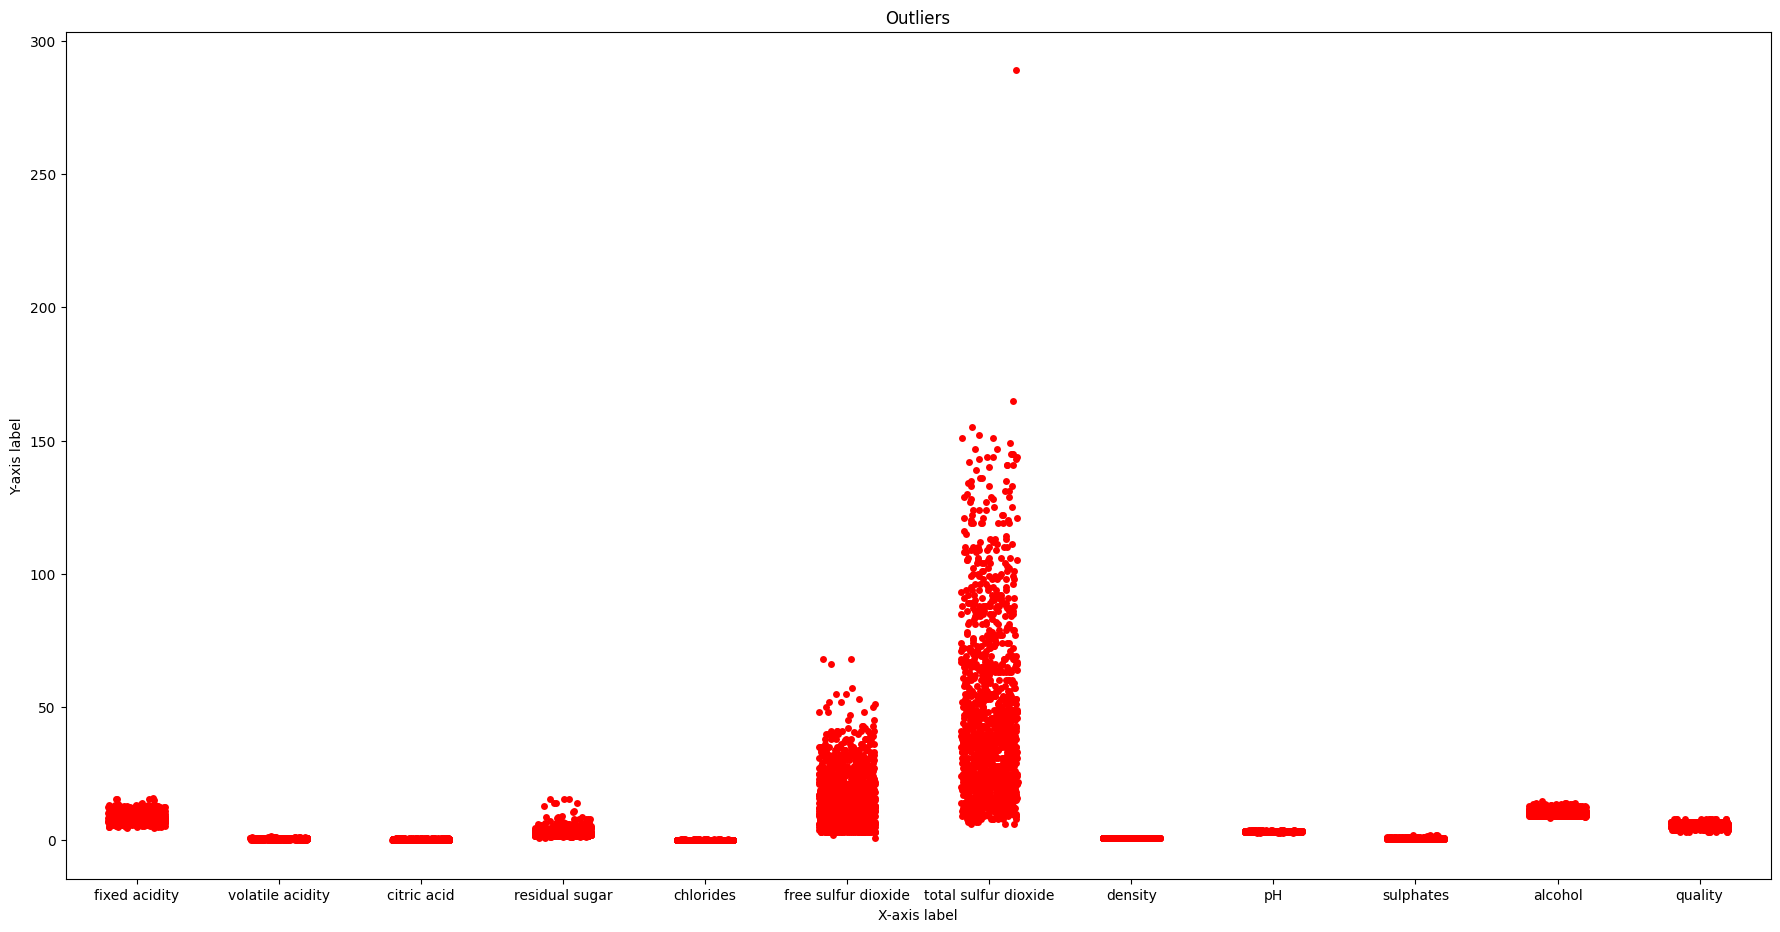

In [73]:
# Set the figure size
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=train_data, color="red", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

# Show the plot
plt.show()

In [74]:
# Delete the outliers
# The data before deleting outliers
print("Before Removing the outliers", train_data.shape)

# Deleting outliers (Removing the number of observation where the total sulfur dioxide is more than 160)
train_data= train_data[train_data['total sulfur dioxide']<160]

#The data after deleting outliers
print("After Removing the outliers", train_data.shape)

Before Removing the outliers (1279, 12)
After Removing the outliers (1277, 12)


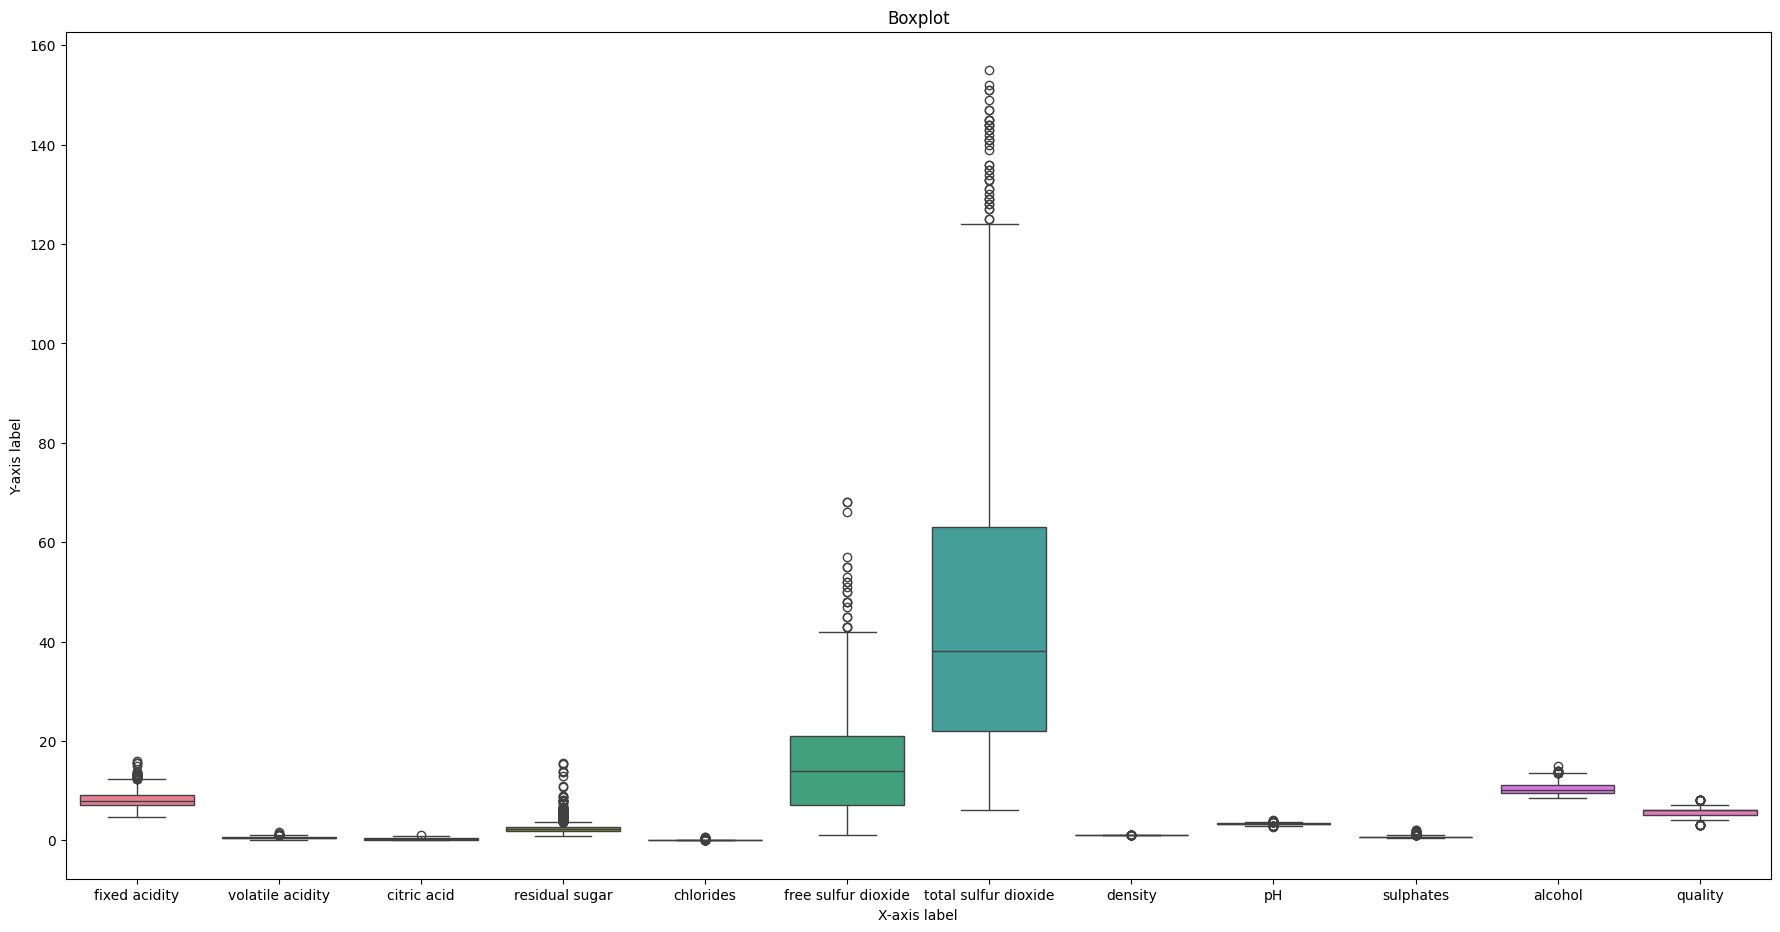

In [75]:
#After Handling Outliers
# Set the figure size
plt.figure(figsize=(22, 11))

# Plot the boxplot
sns.boxplot(data=train_data)

# Set the axis labels and title
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Boxplot")

# Show the plot
plt.show()

Handiling Duplicates

In [76]:
duplicate_count = train_data.duplicated().sum()
print(duplicate_count)

168


In [77]:
train_data = train_data.drop_duplicates(keep="last")
print(train_data.shape)

(1109, 12)


**Data normalization or standardization**


In [78]:

X = train_data.drop('quality',axis=1)
# The lambda function assigns a value of 1 if the 'quality' value is greater than or equal to 5, otherwise assigns 0
Y = train_data['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#Document data preprocessing steps thoroughly


#Transformation Pipeline

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
                               ('imputer', imputer),
                               ('min_max_scaler', min_max_scaler),])
transform_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('min_max_scaler', MinMaxScaler())])

Extracing features and target comun

In [80]:
x_train = X
y_train = Y
x_test = test_data.drop(columns=["quality"])
y_test= test_data['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)

#Model Development and Evaluation
We are gonna use 3 models and Evaluate them and get best model among them and will use it for further project


*   Linear Regression
*   Decsion Tree
* Random Forest





**Linear Regression**

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error

quality_predictions =  lin_reg.predict(x_train)
mean_squared_error(y_train, quality_predictions)

0.04169598939394995

In [83]:
#data testing
x_test = transform_pipeline.transform(x_test)

quality_test_predictions = lin_reg.predict(x_test)
mean_squared_error(y_test, quality_test_predictions)

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.02895639783487755

Text(0, 0.5, 'Predicted quality')

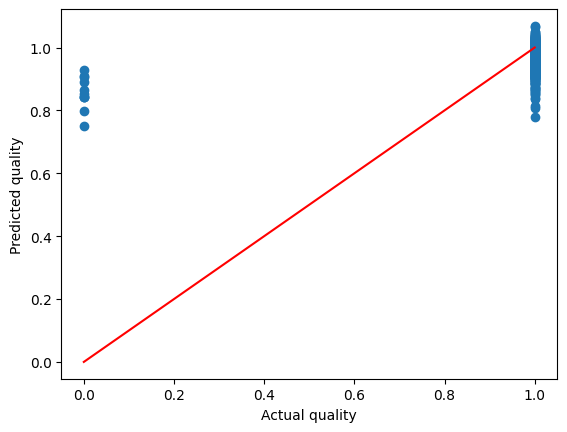

In [84]:
plt.scatter(y_test, quality_test_predictions)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.

Decision Tree Model

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [86]:
quality_predictions =  tree_reg.predict(x_train)
mean_squared_error(y_train, quality_predictions)

0.0

In [87]:
quality_test_predictions = tree_reg.predict(x_test)
mean_squared_error(y_test, quality_test_predictions)

0.078125

Note that the training error is 0, while the test error is 0.58. This is an example of an overfitted model.



Text(0, 0.5, 'Predicted quality')

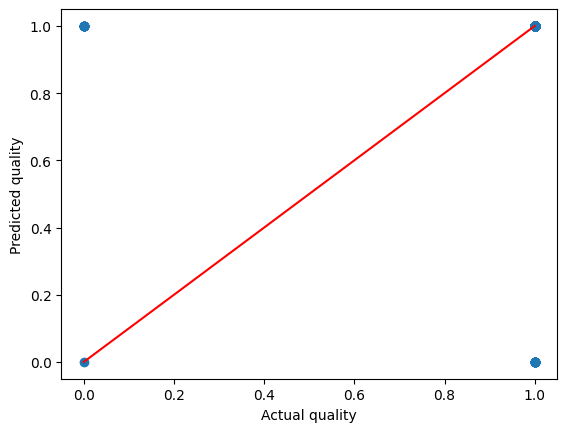

In [88]:
plt.scatter(y_test, quality_test_predictions)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

**Random Forest Model**

In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [90]:
quality_test_predictions = forest_reg.predict(x_test)

mean_squared_error(y_test, quality_test_predictions)

0.032889375

Text(0, 0.5, 'Predicted quality')

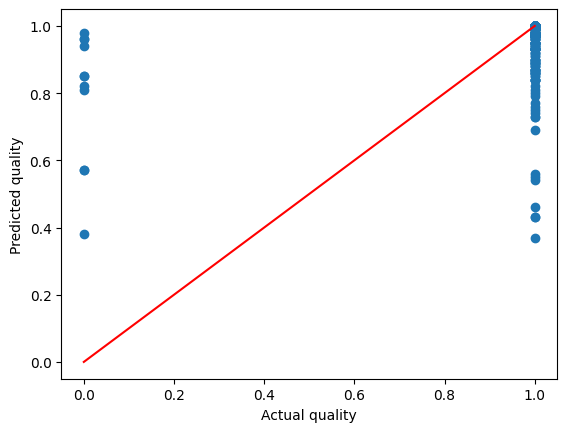

In [91]:
plt.scatter(y_test, quality_test_predictions)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Random forest looks more promising than the other two

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
quality_test_predictions = (quality_test_predictions >= 0.5).astype(int)
accuracy = accuracy_score(y_test, quality_test_predictions)
precision = precision_score(y_test, quality_test_predictions)
recall = recall_score(y_test, quality_test_predictions)
f1 = f1_score(y_test, quality_test_predictions)
conf_matrix = confusion_matrix(y_test, quality_test_predictions)
print(accuracy)
print(precision)
print(recall)
print(f1)
print(conf_matrix)

0.95625
0.9682539682539683
0.9870550161812298
0.9775641025641025
[[  1  10]
 [  4 305]]


In [93]:
#Adding model to the pipeline steps
transform_pipeline.steps.append(("randomForestModel", forest_reg))

In [94]:
data  = df.sample(1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
140,8.4,0.745,0.11,1.9,0.09,16.0,63.0,0.9965,3.19,0.82,9.6,5


In [95]:
model_with_pipeline = Pipeline(transform_pipeline.steps)
model_with_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('min_max_scaler', MinMaxScaler()),
                ('randomForestModel', RandomForestRegressor())])

In [96]:
X = data.drop(columns=["quality"],axis=1)
Y = data['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)
result = model_with_pipeline.predict(X)
result[0]

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1.0

In [97]:


import joblib

# Save the model
joblib.dump(model_with_pipeline, 'model_with_pipeline.joblib')


['model_with_pipeline.joblib']